In [ ]:
import pandas as pd

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
#Close price forecasting
data=df["Close"]
data

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [8]:
#MinmaxScaler 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
minmax=MinMaxScaler(feature_range=(0,1))
df1=minmax.fit_transform(np.array(data).reshape(-1,1))

In [9]:
df1.shape , df


((2035, 1),
             Date    Open    High     Low    Last   Close  \
 0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
 1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
 2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
 3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
 4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
 ...          ...     ...     ...     ...     ...     ...   
 2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
 2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
 2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
 2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
 2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   
 
       Total Trade Quantity  Turnover (Lacs)  
 0                  3069914          7162.35  
 1                  5082859         11859.95  
 2                  2240909          5248.60  
 3                  2349368          5503.90  
 4                 

In [10]:
#Train-Test Split
train_size=round(len(df)*.75)
train_size

1526

In [11]:
train=df1[:train_size]
train,train.shape

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.18831699],
        [0.18811275],
        [0.17034314]]),
 (1526, 1))

In [ ]:
test=df1[train_size:]
test,test.shape

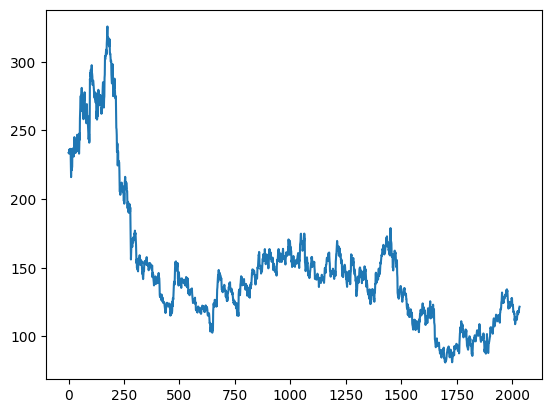

In [13]:
import matplotlib.pyplot as plt
plt.plot(data)

In [14]:
#data Preprocessing to train and test LSTM MODEL
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [15]:
X_train,Y_train=create_dataset(train,100)
X_test,Y_test=create_dataset(test,100)

In [16]:
X_train.shape,Y_train.shape

((1425, 100), (1425,))

In [17]:
X_test.shape,Y_test.shape

((408, 100), (408,))

In [18]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test.shape

(408, 100, 1)

In [ ]:
#LSTM Model creating
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional


In [20]:
model=Sequential()
model.add((LSTM(50,return_sequences=True, input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))


In [ ]:
model.compile(loss="mean_absolute_error",optimizer="adam")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 bidirectional (Bidirection  (None, 100, 100)          40400     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 111301 (434.77 KB)
Trainable params: 111301 (434.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#train the Model 
hist=model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=20,batch_size=64)

Epoch 1/20
23/23 [==============================] - 12s 132ms/step - loss: 0.0939 - val_loss: 0.0438
Epoch 2/20
23/23 [==============================] - 1s 27ms/step - loss: 0.0412 - val_loss: 0.0291
Epoch 3/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0275 - val_loss: 0.0382
Epoch 4/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0269 - val_loss: 0.0241
Epoch 5/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0254 - val_loss: 0.0181
Epoch 6/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0224 - val_loss: 0.0177
Epoch 7/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0208 - val_loss: 0.0178
Epoch 8/20
23/23 [==============================] - 1s 25ms/step - loss: 0.0213 - val_loss: 0.0154
Epoch 9/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0205 - val_loss: 0.0159
Epoch 10/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0195 - val_loss: 0.0153
Epoch 1

In [23]:
#predicting model
X_train_pred=model.predict(X_train)
X_test_pred=model.predict(X_test)

13/13 [==============================] - 0s 9ms/step


In [24]:
train_predict=minmax.inverse_transform(X_train_pred)
test_predict=minmax.inverse_transform(X_test_pred)

In [25]:
Y_test=Y_test.reshape(np.array(Y_test).shape[0],1)


In [ ]:
Y_test=minmax.inverse_transform(Y_test)
Y_test

In [27]:
from sklearn.metrics import mean_absolute_error
import math
math.sqrt(mean_absolute_error(Y_test,test_predict))

1.7360784416366168

In [29]:
import math
error=abs(Y_test-test_predict).mean()
error

3.013968355515424

In [30]:
len(Y_test)

408

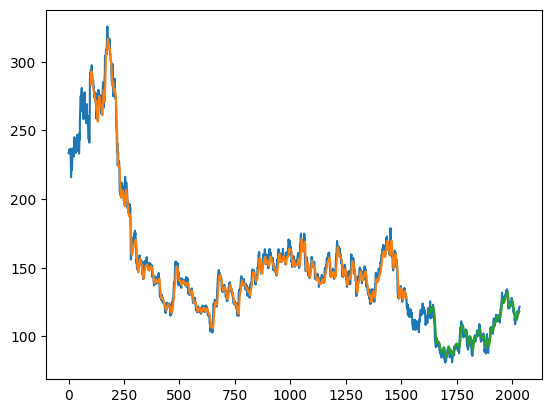

In [44]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
v=0
plt.plot(minmax.inverse_transform(df1)[v:])
plt.plot(trainPredictPlot[v:])
plt.plot(testPredictPlot[v:])
plt.show()

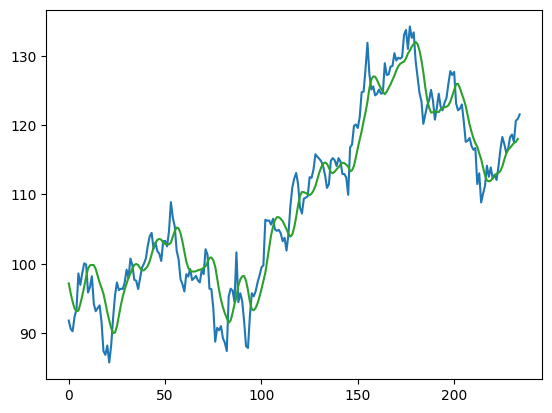

In [49]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
v=1800
plt.plot(minmax.inverse_transform(df1)[v:])
plt.plot(trainPredictPlot[v:])
plt.plot(testPredictPlot[v:])
plt.show()

In [ ]:
#forecasting nest 100 days data
list1=(X_test[-1]).reshape(100).tolist()
list1
final_list=[]

for i in range(0,100):
  new_value=model.predict(np.array(list1).reshape(1,100,1))
  list1.append(new_value[0][0])
  list1.pop(0)
  minmax_vale=minmax.inverse_transform(new_value)[0][0]
  final_list.append(minmax_vale)


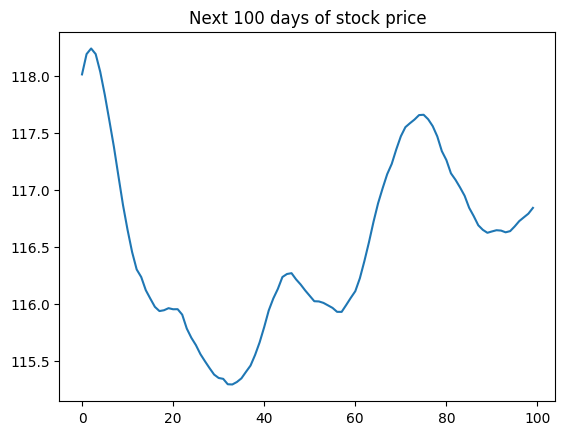

In [160]:
#Next 100 days of stock price"
plt.title("Next 100 days of stock price")
plt.plot(final_list)
